## All you need is love… And a pet!

<img src="img/dataset-cover.jpg" width="920">

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

In [15]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
import seaborn as sns

import matplotlib.pyplot as plt
import scipy
from itertools import combinations
import ast
import seaborn as sns

data_folder = './data/'

### A) Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). 
- Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. 
- Standardize the values of each feature in the data to have mean 0 and variance 1.

The use of external libraries is not permitted in part A, except for numpy and pandas. 
You can drop entries with missing values.

In [16]:
columns = ['animal_type', 'intake_year', 'intake_condition', 'intake_number', 'intake_type', 'sex_upon_intake',
           'age_upon_intake_(years)', 'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(years)',
           'outcome_type']
original_data = pd.read_csv(data_folder + 'aac_intakes_outcomes.csv', usecols=columns)

In [17]:
df = original_data.copy()
print(df.isna().sum())
if df.isna().sum().sum() != 0:
    df = df.dropna()

print("\n\n")
print(df.isna().sum())

outcome_type                10
sex_upon_outcome             1
age_upon_outcome_(years)     0
animal_type                  0
intake_condition             0
intake_type                  0
sex_upon_intake              1
age_upon_intake_(years)      0
intake_year                  0
intake_number                0
time_in_shelter_days         0
dtype: int64



outcome_type                0
sex_upon_outcome            0
age_upon_outcome_(years)    0
animal_type                 0
intake_condition            0
intake_type                 0
sex_upon_intake             0
age_upon_intake_(years)     0
intake_year                 0
intake_number               0
time_in_shelter_days        0
dtype: int64


In [18]:
feature_columns = columns[:-1]
df = pd.get_dummies(original_data[feature_columns])
df["adoption"] = (original_data["outcome_type"] == "Adoption").astype(int)
df.iloc[0]

intake_year                       2017.000000
intake_number                        1.000000
age_upon_intake_(years)             10.000000
time_in_shelter_days                 0.588194
age_upon_outcome_(years)            10.000000
animal_type_Bird                     0.000000
animal_type_Cat                      0.000000
animal_type_Dog                      1.000000
animal_type_Other                    0.000000
intake_condition_Aged                0.000000
intake_condition_Feral               0.000000
intake_condition_Injured             0.000000
intake_condition_Normal              1.000000
intake_condition_Nursing             0.000000
intake_condition_Other               0.000000
intake_condition_Pregnant            0.000000
intake_condition_Sick                0.000000
intake_type_Euthanasia Request       0.000000
intake_type_Owner Surrender          0.000000
intake_type_Public Assist            0.000000
intake_type_Stray                    1.000000
intake_type_Wildlife              

In [19]:
TRAIN_SPLIT = 0.8

feature_columns = df.columns[:-1]
n = len(df)

np.random.seed(72)
indices = np.random.permutation(np.arange(n))
df_train, df_test = df.loc[indices[:int(n * 0.8)]], df.loc[indices[int(n * 0.8):]]

X_train, y_train = df_train[feature_columns], df_train["adoption"]
X_test, y_test = df_test[feature_columns], df_test["adoption"]

mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
assert np.allclose(X_train.mean().to_numpy(), 0)
assert np.allclose(X_train.std().to_numpy(), 1)
X_test = (X_test - mean) / std

print(f"len(X_train): {len(X_train)}")
print(f"len(y_train): {len(y_train)}")
print(f"len(X_test): {len(X_test)}")
print(f"len(y_test): {len(y_test)}")

assert len(pd.merge(X_train, y_train, left_index=True, right_index=True)) == len(X_train)
assert len(pd.merge(X_train, y_test, left_index=True, right_index=True)) == 0

len(X_train): 63737
len(y_train): 63737
len(X_test): 15935
len(y_test): 15935


### B) Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities.
- For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. 

In [21]:
# logistic regression
model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [1]:
# CONFUSION MATRIX
# acc, rec, prec, f1 (by hand)
def plot_confusion_matrix(confusion_matrix):
    [[TN, FP],[FN, TP]] = confusion_matrix
    label = np.asarray([['TP {}'.format(TP), 'FP {}'.format(FP)],
                        ['FN {}'.format(FN), 'TN {}'.format(TN)]])

    df_cm = pd.DataFrame(confusion_matrix, index=['Yes', 'No'], columns=['Positive', 'Negative'])

    return sns.heatmap(df_cm, cmap='YlOrRd', annot=label, annot_kws={"size": 16}, cbar=False, fmt='')

def my_metrics(y_true, y_predicted, threshold=None, logs=False):
    if threshold is not None:
        y_predicted = (y_predicted >= threshold).astype(int)

    cf = sklearn.metrics.confusion_matrix(y_true, y_predicted)
    acc = (cf[0, 0] + cf[1, 1]) / cf.sum()
    precision = np.array([
        cf[0, 0] / cf[:, 0].sum(),
        cf[1, 1] / cf[:, 1].sum()
    ])
    recall = np.array([
        cf[0, 0] / cf[0, :].sum(),
        cf[1, 1] / cf[1, :].sum()
    ])
    f1 = 2 * precision * recall / (precision + recall)
    support = np.array([
        cf[0, :].sum(),
        cf[1, :].sum()
    ])

    if logs:
        plot_confusion_matrix(cf)
        print(f"\nAccuracy: {acc}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1: {f1}")
        print(f"support: {support}")

    return {"cf": cf, "acc": acc, "precision": precision, "recall": recall, "f1": f1, "support": support}

In [ ]:
THRESHOLD = 0.5

# train
print(f"Train performance:\n{'-' * 18}")
y_pred = model.predict_proba(X_train)[:, 1]
m = my_metrics(y_train.array, y_pred, THRESHOLD, logs=True)

In [3]:
# test
print(f"\n\nTest performance:\n{'-' * 18}")
y_pred = model.predict_proba(X_test)[:, 1]
m = my_metrics(y_test.array, y_pred, THRESHOLD, logs=True)



Test performance:
------------------


NameError: name 'model' is not defined

### C) Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold.

<ipython-input-22-2fa60aae7301>:10: RuntimeWarning: invalid value encountered in long_scalars
  cf[0, 0] / cf[:, 0].sum(),
<ipython-input-22-2fa60aae7301>:11: RuntimeWarning: invalid value encountered in long_scalars
  cf[1, 1] / cf[:, 1].sum()


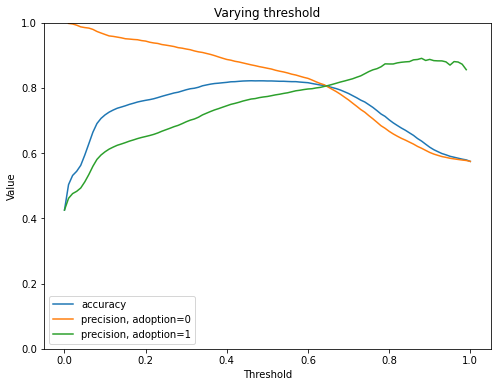

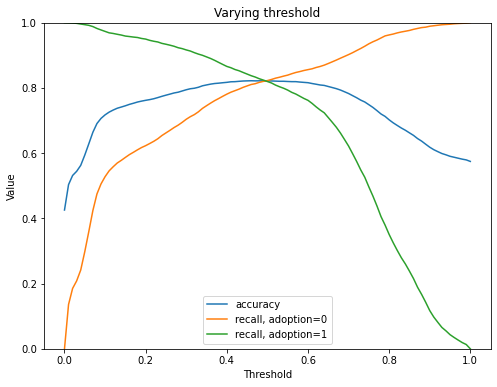

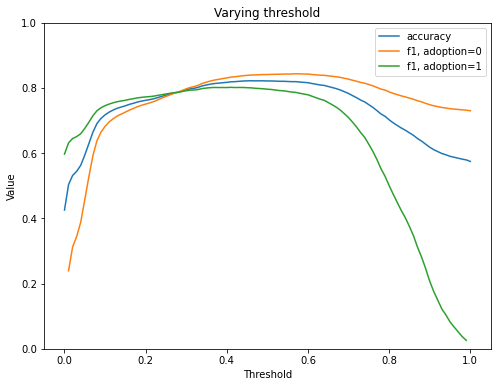

In [25]:
thresholds = np.linspace(0, 1, int(100 / 1) + 1)
y_pred = model.predict_proba(X_test)[:, 1]
ms = [my_metrics(y_test.array, y_pred, t, logs=False) for t in thresholds]
ms = pd.DataFrame(ms)

for metric in ["precision", "recall", "f1"]:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.gca()

    ax.set_xlabel("Threshold")
    ax.set_ylabel("Value")
    ax.set_ylim([0, 1])
    ax.set_title("Varying threshold")

    sns.lineplot(x=thresholds, y=ms["acc"], label="accuracy", ax=ax)

    for label in [0, 1]:
        y = [m[label] for m in ms[metric]]
        sns.lineplot(x=thresholds, y=y, label=f"{metric}, adoption={label}", ax=ax)

    ax.legend()
    plt.show()
    plt.close()


### D) Plot in a bar chart the coefficients of the logistic regression sorted by their contribution to the prediction.

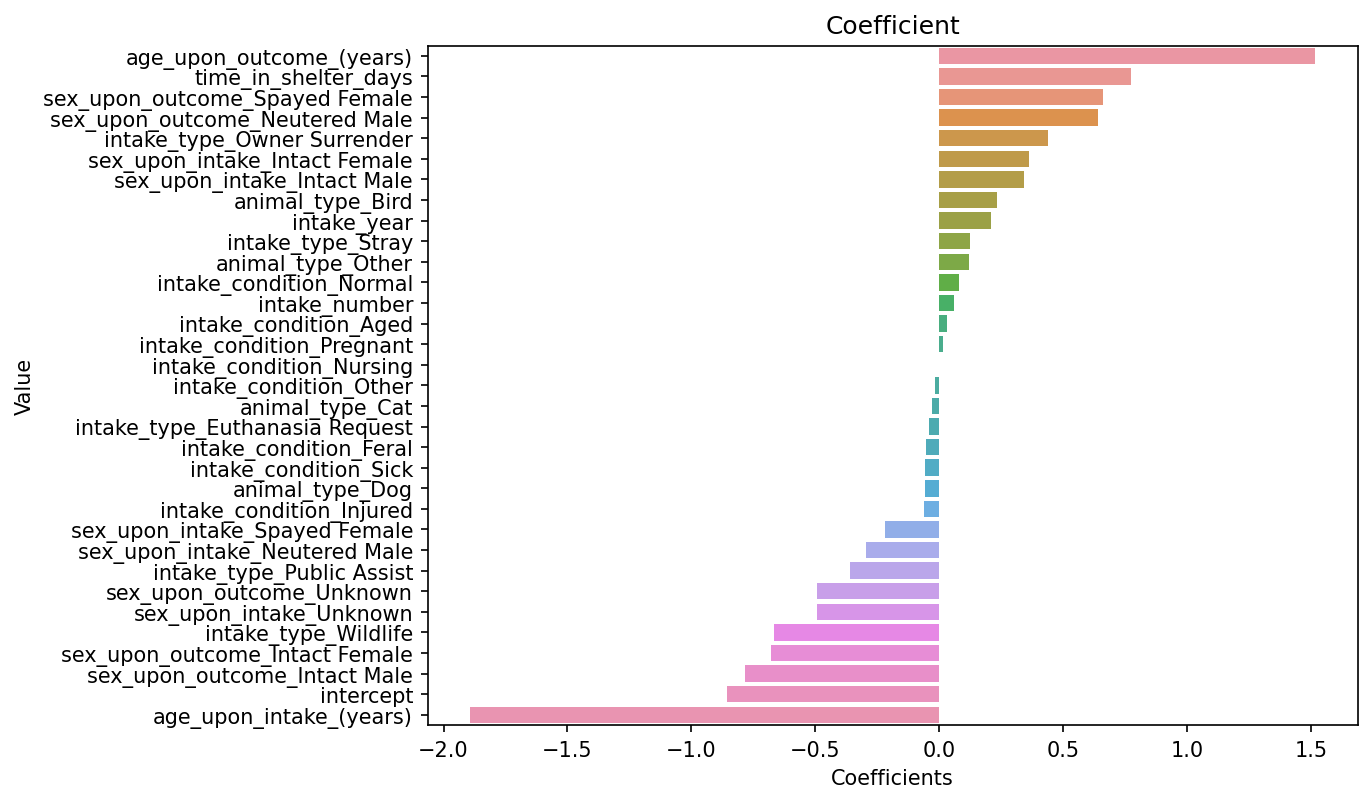

In [29]:
fig = plt.figure(figsize=(8, 6), dpi=150)
ax = fig.gca()

ax.set_xlabel("Coefficients")
ax.set_ylabel("Value")
ax.set_title("Coefficient")

pairs = list(zip(model.coef_[0], X_train.columns))
pairs = [(model.intercept_[0], "intercept")] + pairs
pairs = list(reversed(sorted(pairs)))
# print(pairs)
sns.barplot(x=[p[0] for p in pairs], y=[p[1] for p in pairs], ax=ax)

plt.show()
plt.close()


## Question 1: Which of the following metrics is most suitable when you are dealing with unbalanced classes?

- a) F1 Score
- b) Recall
- c) Precision
- d) Accuracy

In [30]:
"""F1 score because it combines both recall and precision and we do not know which one will be good or better, just that accuracy will be terrible. F1 does not forgive, does not forget."""

'F1 score because it combines both recall and precision and we do not know which one will be good or better, just that accuracy will be terrible. F1 does not forgive, does not forget.'

## Question 2: You are working on a binary classification problem. You trained a model on a training dataset and got the following confusion matrix on the test dataset. What is true about the evaluation metrics (rounded to the second decimal point):

|            | Pred = NO|Pred=YES|
|------------|----------|--------|
| Actual NO  |    50    |   10   |
| Actual YES |    5     |   100  |

- a) Accuracy is 0.95
- b) Accuracy is 0.85
- c) False positive rate is 0.95
- d) True positive rate is 0.95

In [31]:
"D"

'D'